# Welcome to Quantum Spy Training Part 1

<h2 style="font-size: 30px;"><span style="font-family: cursive;"><strong style="color: red;">Introduction</h2></span>


<p style="font-size: 18px;">Welcome to Quantum Spy Training! You have been recruited by a top-secret organization for your exceptional problem-solving skills. Your mission, should you choose to accept it, is to retrieve classified information from a highly secure facility using quantum technology. Your journey starts now!</p>

<div style="text-align: center;">
  <img src="https://drive.google.com/uc?id=1m9dZivH3V5BZLx41pjIt5H8r5FkVE0F8" width="600"/>
</div>

<h2 style="font-size: 30px;"><span style="font-family: cursive;"><strong style="color: red;">Chapter 1:</strong> Getting started </h2></span>

<h3 style="font-size: 23px;"><strong style="color: red;">Exercise 1: Setting Up Qiskit</strong> </h3>


<p style="font-size: 17px;"><strong style="color: blue;">YOUR TURN: Task 1.1: </strong>Install Qiskit on your local machine and set up your development environment.</p>


In [1]:
!pip install qiskit
!pip install qiskit-aer
!pip install matplotlib
!pip install pylatexenc
!pip install numpy
!pip3 install tqdm

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, QuantumRegister, transpile, Aer, IBMQ, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
#from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from tqdm.notebook import tqdm

from qiskit.providers.aer import QasmSimulator
from qiskit.tools.monitor import job_monitor
from qiskit.circuit import Parameter
import qiskit.quantum_info as qi

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

import pylatexenc # Required to use 'MatplotlibDrawer'.
import IPython

from qiskit import QuantumCircuit, execute, Aer, IBMQ, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_bloch_multivector

points = 0

<h2 style="font-size: 30px;"><span style="font-family: cursive;"><strong style="color: red;"> Chapter 2: </strong>Unraveling the Quantum Secrets</span></h2>

<h3 style="font-size: 20px;">What is a qubit?</h3>
<p style="font-size: 18px;">A qubit is a physical object that obeys the laws of quantum mechanic and can be manipulated with quantum gates. Different qubit technologies exist (photons, ions, neutral atoms, superconducting josephson-junctions, topological qubits).</p>

<p style="font-size: 18px;">Qubits have two basic properties that make them special and different from ordinary bits:</p>
<ol style="font-size: 18px;">
  <li><strong>Superposition</strong>: while classical bits can only obtain the values 0 or 1, qubits can obtain combined states. Qubit states are described by complex valued vectors</li>

<br>
<p style="font-size: 16px;">$\vert \Psi \rangle = \begin{pmatrix}a\\b\end{pmatrix}$</p>

<p style="font-size: 18px;">Be careful, qubits obtain these superposition states only during computation. However, to retrieve computation results, they must be measured and this will lead to the so called "collapse of the wave-function", i.e. only one of the states will manifest in the measurement.</p>
<div style="text-align: center;">
  <img src="https://drive.google.com/uc?id=10Gf_H06VdBcyKl9Oyq1EF-_bWG9azeK5" alt="drawing" width="600"/>

</div>
<br>
  <li>
      <strong>Entanglement</strong>: Entanglement is a phenomenon in quantum physics where two or more qubits become interconnected in such a way that their properties become correlated, even when they are physically separated. It is a unique characteristic of quantum systems that cannot be observed in traditional, non-quantum systems.

When qubits are entangled, the properties of each qubit can no longer be described independently. Instead, the collective state of the entangled qubits must be described as a whole. This means that the combination of properties of the qubits together is different from the sum of the properties of each qubit individually.

For example, let's consider two entangled qubits, qubit A and qubit B. If qubit A is measured and found to be in a certain state, then instantaneously the state of qubit B is also determined, regardless of the physical distance between them. The properties of qubit A and qubit B are strictly correlated, meaning that their states are linked in a way that cannot be explained by classical physics.

This correlation is what makes entanglement so fascinating and useful in quantum computing. It allows for the creation of quantum superpositions and enables quantum states to be manipulated and transmitted in ways that would be impossible in classical systems. Entanglement plays a crucial role in various quantum algorithms and protocols, including quantum teleportation, quantum cryptography, and quantum error correction.qubits can form collective states, where properties of individual qubits are strictly correlated, i.e. the sum is different from its parts. A phenomenon that cannot be observed in non-quantum systems.</li>

<p style="font-size: 18px;">$\vert \Psi \rangle \neq \vert \Phi_0 \rangle \otimes \vert \Phi_1 \rangle$</p>
</ol>

<div style="text-align: center;">
  <img src="https://drive.google.com/uc?id=1aZstaqCQEmmGDRCOLmcm7RbWHrjVKIFK" alt="drawing" width="600"/>
</div>
<h3 style="font-size: 20px;">What are quantum circuits?</h3>
<p style="font-size: 18px;">Quantum circuits are models for quantum computation in which a computation is a sequence of quantum gates. Quantum gates often represent rotations on the Bloch sphere.


<h3 style="font-size: 20px;">Executing Quantum Circuit</h3>

<p style="font-size: 16px;">In order to exercute quantum circuits, we need to understand the following procedure.First, we define a little helper function to execute the circuits we will define in the next steps.
Generally, executing a quantum circuit with qiskit follows this schema:</p>
<ol style="font-size: 18px;">
 <li>Select a backend (there are different simulators and real quantum computers you can choose from) </li>
 <li>Submit a job to the backend (on a real device you will have to wait now, on a simulator the job will be executed right away) </li>
 <li>Fetch the result of the computation </li>
<li> Extract the target information from the result (counts, state vector, ...)</li>
</ol>

In [2]:
from qiskit import Aer
from qiskit.visualization import plot_bloch_multivector

def exec_and_get_statevector(circuit):
    backend = Aer.get_backend('statevector_simulator')
    job = backend.run(circuit)
    result = job.result()
    statevector = result.get_statevector()

    return statevector

<h3 style="font-size: 23px;"><strong style="color: red;"><span Exercise 2: Quantum Gates and Circuits</strong></h3>
<p style="font-size: 18px;">In this exercise you will learn how to build quantum circuits from single qubit gates using Qiskit, execute circuits on a simulator and visualize the resulting state-vector.  Let's take a look at some of the popular quantum gates.</p>

<p style="font-size: 20px;" ><strong style="color: blue;">Task 2.1: Exploring the X-Gate</strong></p>

### X gate 
<p style="font-size: 18px;">
The X-gate is represented by the Pauli-X matrix: 

$X = \begin{pmatrix}
0 & 1 \\
1 & 0 \\
\end{pmatrix}$ </p>

<p style="font-size: 18px;">
An X gate equates to a rotation around the X-axis of the Bloch sphere by $\pi$ radians. It maps $|0\rangle$ to $|1\rangle$ and $|1\rangle$ to $|0\rangle$. It is the quantum equivalent of the NOT gate for classical computers and is sometimes called a bit-flip.</p>


<div style="text-align: center;">
  <img src="https://drive.google.com/uc?id=16xRK7S3erbjrTZShK8-AMEHUfv6F96SA" alt="drawing" width="500"/>
</div>

### Instructions

<p style="font-size: 17px;"><strong style="color: blue;">YOUR TURN: Task 2.1.1</strong>:<strong> 1. Create a new Quantum Circuit called xgate with 1 qubit</strong> </p>


In [3]:
xgate = QuantumCircuit(1)

In [4]:
#test
assert isinstance(xgate, QuantumCircuit), "xgate should be a QuantumCircuit"
assert xgate.num_qubits == 1, "xgate should have 1 qubit"


if isinstance(xgate, QuantumCircuit) and xgate.num_qubits == 1:
    points += 1
    print("Yayy🥳🥳! You scored 1/1 points")

Yayy🥳🥳! You scored 1/1 points



<p style="font-size: 17px;"><strong style="color: blue;">YOUR TURN: Task 2.1.2:</strong><strong> 2. Apply an X-gate on the qubit, this flips a qubit from 0 to 1.</strong></p>


In [5]:
# Apply X-gate on qubit 0
xgate.x(0)

In [6]:
#test
assert xgate.count_ops()['x'] == 1, "X gate should be applied to qubit 0"


if xgate.count_ops()['x'] == 1:
    points += 1
    print("Yayy🥳🥳! You scored 1/1 points")

Yayy🥳🥳! You scored 1/1 points



<p style="font-size: 17px;"><strong style="color: blue;">OUR TURN:</strong><strong>  3. Now we will draw the circuit. </strong>You can see the wire which represents qubit and the x-gate which you applied </p>


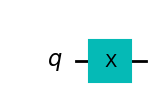

In [7]:
xgate.draw(output='mpl')


<p style="font-size: 17px;"><strong style="color: blue;">OUR TURN:</strong><strong>4. Visualizig on the Bloch Sphere: </strong

After qubit initialization the state vector points always to the $\vert 0 \rangle$ state, after applying the X-gate, it is flipped to the other $\vert 1 \rangle$ state. </p>





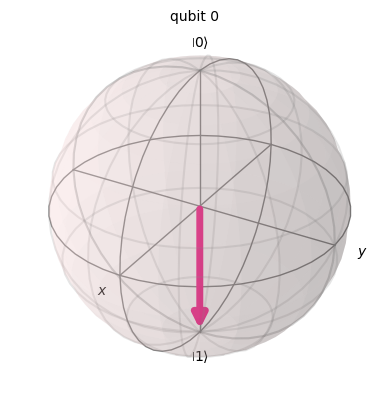

In [8]:
statevector = exec_and_get_statevector(xgate)
plot_bloch_multivector(statevector)

<p style="font-size: 20px;"><strong style="color: blue;">Task 2.2: Exploring the Y-Gate</strong></p>

### Y gate 


<p  style="font-size: 18px;">
The Y-gate is represented by the Pauli-Y matrix: 

$Y = \begin{pmatrix}
0 & -i \\
i & 0 \\
\end{pmatrix}$

</p>

<p  style="font-size: 18px;">
The Y gate corresponds to a rotation around the Y-axis of the Bloch sphere by $\pi$ radians. It maps $|0\rangle$ to $i|1\rangle$ and $|1\rangle$ to $-i|0\rangle$. This gate introduces a phase flip and can be considered as a combination of a bit-flip and a phase-flip gate. </p>


<div style="text-align: center;">
  <img src="https://drive.google.com/uc?id=1hMU621RNPPKiTTrDK0Bwhio0v5QKhOYF" alt="drawing" width="500"/>
</div>

### Instructions

<p style="font-size: 17px;"><strong style="color: blue;">YOUR TURN: Task 2.2.1</strong>:<strong> 1. Create a new Quantum Circuit called ygate with 1 qubit</strong> </p>


In [9]:
# YOUR CODE HERE
ygate = QuantumCircuit(1)

In [10]:
#test
assert isinstance(ygate, QuantumCircuit), "ygate should be a QuantumCircuit"
assert ygate.num_qubits == 1, "ygate should have 1 qubit"


if isinstance(ygate, QuantumCircuit) and ygate.num_qubits == 1:
    points += 1
    print("Yayy🥳🥳! You scored 1/1 points")

Yayy🥳🥳! You scored 1/1 points



<p style="font-size: 17px;"><strong style="color: blue;">YOUR TURN: Task 2.2.2</strong>:<strong> 2. Apply an Y-Gate on ygate on qubit 0</strong> </p>



In [11]:
#YOUR CODE HERE
ygate.y(0)

In [12]:
#test
assert ygate.count_ops()['y'] == 1, "Y gate should be applied to qubit 0"


if ygate.count_ops()['y'] == 1:
    points += 1
    print("Yayy🥳🥳! You scored 1/1 points")

Yayy🥳🥳! You scored 1/1 points



<p style="font-size: 17px;"><strong style="color: blue;">OUR TURN:</strong><strong>  3. Now we will draw the circuit. </strong>You can see the wire which represents qubit and the y-gate which you applied </p>


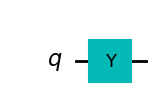

In [13]:
ygate.draw(output='mpl')


<p style="font-size: 17px;"><strong style="color: blue;">OUR TURN:</strong><strong>4. Visualizig on the Bloch Sphere: </strong

After qubit initialization the state vector points always to the $\vert 0 \rangle$ state, after applying the Y-gate, it is flipped to the other $\vert 1 \rangle$ state. </p>





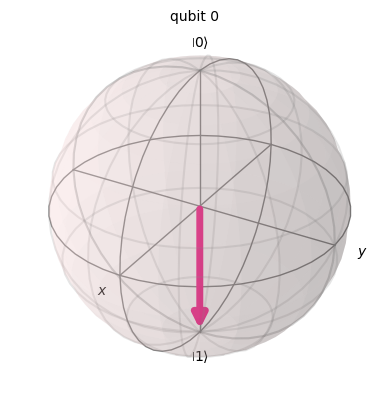

In [14]:
statevector = exec_and_get_statevector(ygate)
plot_bloch_multivector(statevector)

<p style="font-size: 20px;"><strong style="color: blue;">Task 2.3: Exploring the H-Gate</strong></p>


### Hadamard gate

<p  style="font-size: 18px;">
A Hadamard gate represents a rotation of $\pi/2$ about the y-axis.
It maps the basis states $|0\rangle$ to $\frac{|0\rangle + |1\rangle}{\sqrt{2}} = \vert + \rangle$ and $\vert 1 \rangle$ to $\frac{|0\rangle - |1\rangle}{\sqrt{2}} = \vert - \rangle$, which means that a measurement will have equal probabilities of being `1` or `0`, creating a 'superposition' of states.

$H = \frac{1}{\sqrt{2}}\begin{pmatrix}
1 & 1 \\
1 & -1 \\
\end{pmatrix}$ </p>

<p>


### Instructions

<p style="font-size: 17px;"><strong style="color: blue;">YOUR TURN: Task 2.3.1</strong>:<strong> 1. Create a new Quantum Circuit called hgate with 1 qubit</strong> </p>




In [15]:
#YOUR CODE
hgate = QuantumCircuit(1)

In [16]:
#Test
assert isinstance(hgate, QuantumCircuit), "hgate should be a QuantumCircuit"
assert hgate.num_qubits == 1, "hgate should have 1 qubit"


if isinstance(hgate, QuantumCircuit) and hgate.num_qubits == 1:
    points += 1
    print("Yayy🥳🥳! You scored 1/1 points")

Yayy🥳🥳! You scored 1/1 points



<p style="font-size: 17px;"><strong style="color: blue;">YOUR TURN: Task 2.3.2</strong>:<strong>Apply an H-Gate on hgate on qubit 0</strong> </p>


In [17]:
# Apply Y-gate on qubit 0
hgate.h(0)

In [18]:
#test
assert hgate.count_ops()['h'] == 1, "H gate should be applied to qubit 0"


if hgate.count_ops()['h'] == 1:
    points += 1
    print("Yayy🥳🥳! You scored 1/1 points")

Yayy🥳🥳! You scored 1/1 points



<p style="font-size: 17px;"><strong style="color: blue;">OUR TURN: </strong><strong>4. Visualizig on the Bloch Sphere: </strong

After qubit initialization the state vector points always to the $\vert 0 \rangle$ state, after applying the H-gate, it is flipped to the superposition state</p>





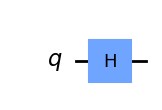

In [19]:
hgate.draw(output='mpl')

4. Simulate your results in 'statevector_simulator', display it on the bloch sphere


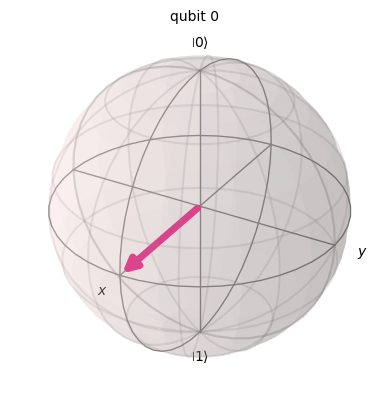

In [20]:
statevector = exec_and_get_statevector(hgate)
plot_bloch_multivector(statevector)

<h2 style="font-size: 30px;"><span style="font-family: cursive;"><strong style="color: red;"> Chapter 3: </strong>The Power of Entanglement</span></h2>


### Exercise 3: Quantum Entanglement

<p style="font-size: 20px;"><strong style="color: blue;">Task 3.1: Exploring Quantum Entanglement</strong></p>

<p style="font-size: 18px;"> Understand the concept of entanglement and how to create entangled states.</p>
<p style="font-size: 18px;">
Entanglement is a fundamental concept in quantum mechanics where two or more particles become connected in such a way that their individual states cannot be described independently. When particles are entangled, measuring the state of one particle instantly determines the state of the other, regardless of the distance between them. This phenomenon has been called "spooky action at a distance" by Albert Einstein.</p>
<p style="font-size: 18px;">
To create entangled states, we can perform specific operations, called entangling gates or entangling operations, on the qubits. The commonly used entangling gate is the Controlled NOT (CNOT) gate. The CNOT gate applies a NOT gate to the target qubit if the control qubit is in the state |1⟩, otherwise, it leaves the target qubit unchanged. </p>

### Instructions


<div style="text-align: center;">
  <img src="https://drive.google.com/uc?id=1M6MVpTVE0-Teb5rc9M0H4cgINqthh1TA" alt="drawing" width="500"/>
</div>


<p style="font-size: 17px;"><strong style="color: blue;">YOUR TURN: Task 3.1.1</strong>:<strong> 1. Create a new Quantum Circuit called qc with 2 qubits</strong> </p>


In [21]:
# YOUR CODE STARTS HERE
qc = QuantumCircuit(2)

In [22]:
#Test
assert isinstance(qc, QuantumCircuit), "qc should be a QuantumCircuit"
assert qc.num_qubits == 2, "qc should have w qubits"


if isinstance(qc, QuantumCircuit) and qc.num_qubits == 2:
    points += 1
    print("Yayy🥳🥳! You scored 1/1 points")
    

Yayy🥳🥳! You scored 1/1 points


<p style="font-size: 17px;"><strong style="color: blue;">YOUR TURN: Task 3.1.2</strong>:<strong> 2. Apply quantum gates to entangle the qubits.(H and CNOT)</strong> </p>


In [23]:
def circuit_ent(qc):
    qc.h(0)
    qc.cx(0, 1)


In [24]:
# Test - dont change anything here
circuit_ent(qc)
backend = Aer.get_backend('statevector_simulator')
job = backend.run(qc)
result = job.result()
outputstate = result.get_statevector(qc, decimals=4)
# Define the expected state
expected_state = [1./np.sqrt(2.), 0., 0., 1./np.sqrt(2.)]
# Check if the outputstate exactly matches the expected_state
assert np.allclose([1./np.sqrt(2.), 0., 0., 1./np.sqrt(2.)], outputstate.data)
if np.allclose([1./np.sqrt(2.), 0., 0., 1./np.sqrt(2.)], outputstate.data):
    points += 1
    print("Yayy🥳🥳! You scored 1/1 points")

Yayy🥳🥳! You scored 1/1 points


<p style="font-size: 17px;"><strong style="color: blue;">OUR TURN: Task 3.1.3</strong>:<strong> 3. Measure the entanlged qubits</strong> </p>


In [25]:
qc.measure_all()

4. Simulate the quantum circuit and measure the resultant states

In [26]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1000)
result = job.result()
counts = result.get_counts(qc)

In [27]:
print(counts)

{'11': 517, '00': 483}


<p style="font-size: 18px;">
The measurement result<strong> {'00': 508, '11': 492} (this changes always due to the probabilistic nature and error rate)</strong> shows that the qubits in the circuit were in an entangled state.
When a Hadamard gate (H gate) is applied to qubit 0, it puts the qubit in a superposition state, which means it could be measured as either '0' or '1' with equal probability. However, since the CNOT gate is then applied with qubit 0 as the control and qubit 1 as the target, it entangles the two qubits.
In an entangled state, the measurement outcomes of one qubit can depend on the state of the other qubit. In this case, the measurement result of {'00': 508, '11': 492} indicates that the measurement outcomes of qubit 0 and qubit 1 are correlated. </p>

<h2 style="font-size: 30px;"><span style="font-family: cursive;"><strong style="color: red;"> Chapter 4: </strong>Controlled Rotations</span></h2>


<p style="font-size: 20px;" ><strong style="color: blue;">Task 4.1: Learn to implement multiple controlled rotations </strong></p>

<p style="font-size: 18px;">
Controlled gates in quantum computing are gates that perform a specific transformation on a target qubit, but the operation is conditioned on the state of one or more control qubits. If the control qubits are in a certain state, the gate is applied to the target qubit, otherwise, it is not. These gates act as switches, allowing for selective operations based on the state of the control qubits. Controlled gates are important building blocks in quantum algorithms and can be used to perform complex computations by leveraging the correlations between qubits.<br><br>In quantum computing, rotations around different axes of the Bloch sphere are a fundamental concept. The Bloch sphere is a geometric representation of the quantum states of a qubit, where the north pole corresponds to the state |0⟩, the south pole to the state |1⟩, and all other points on the sphere represent superposition states. Rotations around different axes on the Bloch sphere correspond to different quantum gates that can manipulate the state of a qubit. <br><br>
Examples of controlled gates: <ul><li>Controlled-NOT (CNOT) Gate</li>
    <li>Toffoli Gate</li>
    <li> Controlled Phase (CPh) Gate</li>
    <li>Controlled Hadamard Gate</li>
    <li>Controlled Rotation Gate, Controlled Swap Gate</li></ul> </p>


    
<div style="text-align: center;">
  <img src="https://drive.google.com/uc?id=11Kqeu8lK8jISyB_YLE5RSHf5MLLYBl6g" alt="drawing" width="500"/>
</div>



 ### Instructions

<p style="font-size: 17px;"><strong style="color: blue;">YOUR TURN: Task 4.1.1</strong>:<strong> 1. Create a circuit named circuit_contr with at least 4 qubits.</strong> </p>
<p style="font-size: 15px;">The variable num_qubits have been defined for you. Use it for the circuit defintion</p>


In [28]:
num_qubits = 4

In [29]:
#YOUR CODE HERE
circuit_contr = QuantumCircuit(num_qubits)

In [30]:
#test
assert isinstance(circuit_contr, QuantumCircuit), "circuit_contr should be a QuantumCircuit"
assert circuit_contr.num_qubits == 4, "qc should have 4 qubits"


if isinstance(circuit_contr, QuantumCircuit) and circuit_contr.num_qubits == 4:
    points += 2
    print("Yayy🥳🥳! You scored 2/2 points")

Yayy🥳🥳! You scored 2/2 points



<p style="font-size: 17px;"><strong style="color: blue;">YOUR TURN: Task 4.1.2</strong>:<strong> Apply Hadamard gates to all qubits. USE A FOR-LOOP and the NUM_QUBITS variable</strong> </p>The Hadamard gate (H) puts the control qubits into a superposition of state |0⟩ and |1⟩, allowing for interference in the controlled rotations. 


In [31]:
#YOUR CODE HERE
for i in range(num_qubits):
    circuit_contr.h(i)

In [32]:
expected_count = num_qubits
assert circuit_contr.count_ops()['h'] == expected_count, f"Hadamard gates should be applied to all qubits"

if circuit_contr.count_ops()['h'] == expected_count:
    points += 1
    print("Yayy🥳🥳! You scored 1/1 points")

Yayy🥳🥳! You scored 1/1 points



<p style="font-size: 17px;"><strong style="color: blue;">YOUR TURN: Task 4.1.3</strong>:<strong> Implement crx,cry and crz gate rotations. </strong> </p> 

With rotation gates you can rotate the qubit by a certain angle. Please note to implement it in the following way:
<ol> <li>crx(angle, qubit0,qubit1)</li>
<li>cry(angle, qubit0,qubit2) </li>
<li>cry(angle, qubit0,qubit3) </li></ol>


In [33]:
#YOUR CODE HERE

circuit_contr.crx(0.5, 0, 1)  # Controlled rotation gate between qubits 0 and 1
circuit_contr.cry(0.2, 0, 2)  # Controlled rotation gate between qubits 0 and 2
circuit_contr.crz(0.1, 0, 3)  # Controlled rotation gate between qubits 0 and 3


In [34]:
#Test
assert circuit_contr.get_instructions('crx') != [], "please use controlled rotations along all geometrical axis"
assert circuit_contr.get_instructions('cry') != [], "please use controlled rotations along all geometrical axis"
assert circuit_contr.get_instructions('crz') != [], "please use controlled rotations along all geometrical axis"

if all([
    circuit_contr.get_instructions('crx') != [],
    circuit_contr.get_instructions('cry') != [],
    circuit_contr.get_instructions('crz') != []
]):
    points += 3
    print("Yayy🥳🥳! You scored 3/3 points")

Yayy🥳🥳! You scored 3/3 points


<p style="font-size: 17px;"><strong style="color: blue;">OUR TURN: Task 4.1.4</strong>:<strong> Now we measure the qubits to observe the resulting state </strong> </p> 

In [35]:
circuit_contr.measure_all()

<p style="font-size: 17px;"><strong style="color: blue;">OUR TURN: Task 4.1.5</strong>:<strong> Now we Execute the circuit and obtain the results </strong> </p> 


In [36]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit_contr, simulator, shots=1000)
result = job.result()


<p style="font-size: 17px;"><strong style="color: blue;">OUR TURN: Task 4.1.6</strong>:<strong> Next we get the counts of each measurement outcome</strong> </p> 


In [37]:
counts = result.get_counts(circuit_contr)
print(counts)

{'1001': 41, '1000': 59, '1011': 43, '1010': 76, '1111': 75, '1101': 70, '0111': 77, '0100': 62, '1100': 70, '1110': 70, '0010': 61, '0000': 66, '0101': 73, '0011': 47, '0001': 43, '0110': 67}


<p style="font-size: 18px;">These results indicate the number of times each binary state occurred when measuring the qubits. Each binary state is represented by a 4-bit string, with each bit corresponding to the measurement outcome of a specific qubit. The number associated with each state represents the frequency of obtaining that state after performing the quantum circuit and measuring the qubits multiple times.</p>


<h2 style="font-size: 30px;"><span style="font-family: cursive;"><strong style="color: red;">Congratulations!</strong> We hope you had fun! Run the following cell to see your score</h2></span> 


    
<div style="text-align: center;">
  <img src="https://drive.google.com/uc?id=1mGqntA4AWruk_REpZWrgodbWLZY0p60u" alt="drawing" width="500"/>

</div>

In [38]:
print("Your Score: {} / 14".format(points))
print("Congratulations!")

Your Score: 14 / 14
Congratulations!
